In [ ]:
#import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.backend as bknd
import os
import math

from google.colab import drive
!pip install -q pyyaml h5py

tf.__version__

'2.5.0'

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
drive.flush_and_unmount()

Dataset

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Load Model

In [ ]:
PATH_MODEL = '/content/drive/MyDrive/IA/tesis/code/BNN_test/save_models/'
#PATH_ENTIRE_MODEL = PATH_MODEL + 'bnn_sG_roundConvMax/saved_model/binary_actW'                # 85%   in:255  
PATH_ENTIRE_MODEL = PATH_MODEL + 'bnn_sG_roundConvMax/saved_model/binary_actW'

#PATH_ENTIRE_MODEL = PATH_MODEL + 'cnn_ref/saved_model/cnn_ref98'                      # 98.5%

print(PATH_ENTIRE_MODEL)

/content/drive/MyDrive/IA/tesis/code/BNN_test/save_models/bnn_sG_roundConvMax/saved_model/binary_actW


In [ ]:
model_loaded = tf.keras.models.load_model(PATH_ENTIRE_MODEL)

# Show the model architecture
model_loaded.summary()

# Evaluate the restored model
loss, acc = model_loaded.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d__binary_layer (Conv2D (None, 26, 26, 12)        120       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 12)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 12)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 12)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2028)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2028)              6

Check Outputs

(10000, 28, 28)
(28, 28)
(1, 28, 28)
2


array([[297., 285., 312., 293., 272., 289., 292., 278., 298., 280.]],
      dtype=float32)

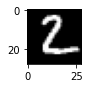

In [ ]:
# img_choosen = 10   # #0
# img_choosen = 5    # #1
img_choosen = 1    # #2
# img_choosen = 334  # #3
# img_choosen = 6    # #4
# img_choosen = 15   # #5
# img_choosen = 50   # #6
# img_choosen = 26   # #7
# img_choosen = 36   # Better #7
# img_choosen = 110  # #8
# img_choosen = 185  # #9

# img_choosen = 8   # Is a #5 that looks like a #6

print(test_images.shape)
plt.figure(figsize=(1,1))
plt.imshow(np.squeeze(test_images[img_choosen,:,:]), cmap='gray')

img_test = test_images[img_choosen,:,:]
print( img_test.shape )
img_test = np.expand_dims( img_test, axis=0 )
print( img_test.shape)

# Model Validation
print(test_labels[img_choosen])
model_loaded.predict( img_test )

297. 285. 312. 293. 272. 289. 292. 278. 298. 280

Visualize Outputs

In [ ]:
#Check BNN's Layers Outputs 
outputs = []
i = 0
model_work = model_loaded
#model_work = model

for layer in model_work.layers:
    keras_function = bknd.function([model_work.input], [layer.output])
    outputs.append(keras_function([img_test]))
    #outputs.append(keras_function(test_images))
    np_output = np.array(outputs[i])
    shape_output = np_output.shape
    max_output = np.amax(np_output)
    min_output = np.amin(np_output)
    print("\n New Output Layer")
    print("_______________________")
    print("Layer: ", layer)
    print("Shape output: ", shape_output)
    print("Max. Value: ", max_output)
    print("Min. Value: ", min_output)
    print(outputs[i])
    i = 1 + i

#print(outputs)


 New Output Layer
_______________________
Layer:  <tensorflow.python.keras.layers.core.Reshape object at 0x7f6011585dd0>
Shape output:  (1, 1, 28, 28, 1)
Max. Value:  255.0
Min. Value:  0.0
[array([[[[  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.]],

        [[  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
         [  0.],
       

### BNN Functions

In [ ]:
#--------------------------------------
# Binary layer definition 
#--------------------------------------

# Activation function 
def binary_hard_tanh(x):
  #return bknd.round( bknd.clip(x, -1, 1) )
  #return ( bknd.clip(x, -1, 1) )
  #return 2.*round_through( hard_sigmoid(x) ) - 1
  return round_through( hard_sigmoid(x) )               # keep activation {0, 1}

def round_through(x):
  rounded = tf.round(x)
  return x + tf.stop_gradient(rounded - x)

def hard_sigmoid(x):
  return bknd.clip( (x+1.)/2., 0, 1)

def sign_function(x):
  x2 = np.clip( (x+1.)/2. , 0, 1)
  return np.around(x2)

def sign_ineq(x, limit):
  if x > -limit:
    return 1
  else:
    return 0

def act_round(x):
  return tf.round(x)

'''
def sign_function(x):
  return 2.*round_through( bknd.clip(x, 0, 1) ) - 1
'''
'''
def sign_function(x):
  #if x >= 0:
  if x > 0:
    return 1
  else: 
    return -1
'''

## Common Layers

Convolution layer

In [ ]:
def conv_single_step(feature_segment, W, b): 
    
    s = np.multiply(feature_segment, W)
    Z = np.sum(s)
    
    Z = Z + np.float32(b)
    return Z

def conv_forward(featureMap, W, b, params_layer):    
  
    # Initialize arrays: Output (Z) & Input padded (featureMap_pad)

    (n_batch, nH_prev, nW_prev, nC_prev) = np.shape(featureMap)
    (f, f, nC_prev, nC) = np.shape(W)
    #print("Input Shape: ", np.shape(featureMap))
    #print("Weights Shape: ", np.shape(W))
    
    # Load High Layer parameters 
    stride = params_layer["stride"]
    pad    = params_layer["pad"]
    
    # Compute the dimensions of the CONV output volume 
    nH = int( (( nH_prev - f + 2*pad )/ stride) + 1 )
    nW = int( (( nW_prev - f + 2*pad )/ stride) + 1 )
    #print("High Output: ", nH)
    #print("Width Output: ", nW)
    
    Z = np.zeros((n_batch, nH, nW, nC))
    
    # Create an array with the feature map size plus padding 
    featureMap_pad = np.pad(featureMap, ((0,0), (pad,pad), (pad,pad), (0,0)), mode='constant', constant_values=(0,0))
    #print("Input Padded: ", np.shape(featureMap_pad))
    
    for i in range(n_batch):                                                    # loop over the batch 
        featuremap_single = featureMap_pad[i,:,:,:]                                # Select ith training example's padded activation
        #print("Window segment sahpe: ", np.shape(featuremap_single))
        for h in range(nH):                                                     # loop over vertical axis of the output volume
            vert_start = h*stride                                               # vertical start corner frame 
            vert_end = vert_start + f
            #print("____")
            #print("Vertical coordinates: ", vert_start, vert_end)

            for w in range(nW):                                                 # loop over horizontal axis of the output volume
                horiz_start = w*stride                                          # Horizontal start corner frame
                horiz_end = horiz_start + f
                #print("Horizontal coordinates: ", horiz_start, horiz_end)
                
                for c in range(nC):                                          
                    segment_window = featuremap_single[vert_start:vert_end, horiz_start:horiz_end]
                    
                    # Compute convolution to the segment window
                    weights = W[:,:,:,c]
                    biases = b[:,:,:,c]
                    Z[i, h, w, c] =  conv_single_step(segment_window, weights, biases)
                                        
    
    # Making sure your output shape is correct
    assert(Z.shape == (n_batch, nH, nW, nC))    
    
    return Z

In [ ]:
a = np.ones((3, 3))
a = np.expand_dims(a, axis=2)
print(a.shape)
print("---------")
W = np.ones((3, 3, 1))
print(W.shape)
print("---------")
b = np.ones((1, 1, 1))
print(b.shape)
print(b)

(3, 3, 1)
---------
(3, 3, 1)
---------
(1, 1, 1)
[[[1.]]]


In [ ]:
conv_single_step(a, W, b) 

array([[[10.]]], dtype=float32)

In [ ]:
a = np.ones((4, 4))
a = np.expand_dims(a, axis=(0,3))
print(a.shape)
print("---------")
W = np.ones((3, 3, 1, 1))
print(W.shape)
print("---------")
b = np.zeros((1, 1, 1, 1))
print(b.shape)
print(b)
print("---------")
paramsLayer = {"pad" : 0, "stride": 1, "f": 0}

(1, 4, 4, 1)
---------
(3, 3, 1, 1)
---------
(1, 1, 1, 1)
[[[[0.]]]]
---------


In [ ]:
img_test = np.expand_dims( img_test, axis=3 )
print( img_test.shape)

(1, 28, 28, 1)


In [ ]:
conv_layer = model_loaded.get_layer(name='conv2d__binary_layer')
conv_weights = conv_layer.get_weights()
print(len(conv_weights[1]))
conv_w = np.array(conv_weights[0])
print(conv_w.shape)
print(np.amax(conv_w))
print(np.amin(conv_w))
conv_b = np.array(conv_weights[1])
conv_b = np.expand_dims( conv_b, axis=(0,1,2))
print(conv_b.shape)
print(np.amax(conv_b))
print(np.amin(conv_b))

12
(3, 3, 1, 12)
1.0
0.0
(1, 1, 1, 12)
0.0
0.0


In [ ]:
#Z_py = conv_forward(a, W, b, paramsLayer)  
Z_py = conv_forward(img_test, conv_w, conv_b, paramsLayer)  
print(Z_py.shape)
#print(Z_py)  

(1, 26, 26, 12)


In [ ]:
tf.nn.conv2d(a, W, strides=[1, 1, 1, 1], padding='VALID')

<tf.Tensor: shape=(1, 2, 2, 1), dtype=float64, numpy=
array([[[[9.],
         [9.]],

        [[9.],
         [9.]]]])>

Compare with model Output

In [ ]:
z_py = np.squeeze( Z_py )
print(z_py.shape)
z_conv_model = np.array( outputs[1] )
z_conv_model = np.squeeze( z_conv_model )
print(z_conv_model.shape)
print("----")

comp_conv = np.subtract( z_py, z_conv_model)
print(comp_conv.shape)
print(np.amax(comp_conv))
print(np.amin(comp_conv))

(26, 26, 12)
(26, 26, 12)
----
(26, 26, 12)
0.0
0.0


take out the Conv. Output 

In [ ]:
PATH_FOLDER = "/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/outLayers_dec/"
FILE_NAME = "conv_out_dec.txt"

PATH_FILE = PATH_FOLDER + FILE_NAME
print(PATH_FILE)

/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/outLayers_dec/conv_out_dec.txt


In [ ]:
save_conv = np.zeros(26*26*12)
print("Shape array Out :", save_conv.shape)
print("Shape Conv. Out :", z_conv_model.shape)

for c in range(12):
  for i in range(26):
    for j in range(26):
      idx = 676*c + 26*i + j
      save_conv[idx] =  z_conv_model[i, j, c]

# for i in range(26):
#   for j in range(26):
#     idx = 26*i + j
#     print(j, save_conv[idx], z_conv_model[i, j, 0])      

Shape array Out : (8112,)
Shape Conv. Out : (26, 26, 12)


In [ ]:
file = open(PATH_FILE, "a")

for i in range(26*26*12):

  dataIn = str( int(save_conv[i]) )
  file.write( dataIn+"\n" )

file.close()

### Max. Pooling layer

In [ ]:
def pool_forward(featureMap, params_layer):   

    # Initialize: Output (Z)
    (n_batch, nH_prev, nW_prev, nC_prev) = featureMap.shape

    f = params_layer["f"]
    stride = params_layer["stride"]
    
    # Define Output dimensions 
    nH = int(1 + ((nH_prev - f) / stride) )
    nW = int(1 + ((nW_prev - f) / stride) )
    nC = nC_prev

    Z = np.zeros((n_batch, nH, nW, nC))              
    
    for i in range(n_batch):                                                    # loop over Batch
        for h in range(nH):                                                     # loop moving over the Vertical axis
            vert_start = h*stride
            vert_end = vert_start + f
            
            for w in range(nW):                                                 # loop moving over the Horizontal axis
                horiz_start = w*stride
                horiz_end = horiz_start + f
                
                for c in range (nC):                                            # loop moving over Channels
                    segment_window = featureMap[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    Z[i, h, w, c] = np.amax(segment_window)
    
    # Making sure your output shape is correct
    assert(Z.shape == (n_batch, nH, nW, nC))
    
    return Z

In [ ]:
a = np.ones((4, 4))
a = np.expand_dims(a, axis=(0,3))
print(a.shape)
#paramsLayer = {"pad" : 0, "stride": 2, "f": 2}
paramsMax = {"pad" : 0, "stride": 2, "f": 2}

(1, 4, 4, 1)


In [ ]:
pool_in = np.array( outputs[2] )
pool_in = np.squeeze( pool_in, axis=0)
print(pool_in.shape)

(1, 26, 26, 12)


In [ ]:
#z_pool_py = pool_forward(a, paramsLayer)
#z_pool_py = pool_forward(pool_in, paramsLayer)
z_pool_py = pool_forward(pool_in, paramsMax)

#print(z_pool_py)
print(z_pool_py.shape)
print(np.amax(z_pool_py))
print(np.amin(z_pool_py))

(1, 13, 13, 12)
1265.0
0.0


Compare Pooling layer 

In [ ]:
pool_outModel = np.array( outputs[4] )
pool_outModel = np.squeeze( pool_outModel)
print(pool_outModel.shape)
z_pool_py = np.squeeze( z_pool_py )

comp_pool = np.subtract( pool_outModel, z_pool_py )
print(comp_pool.shape)
print(np.amax(comp_pool))

(13, 13, 12)
(13, 13, 12)
0.0


take out the Max. Pooling Output Layer

In [ ]:
PATH_FOLDER = "/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/outLayers_dec/"
FILE_NAME = "maxpool_out_dec.txt"

PATH_FILE = PATH_FOLDER + FILE_NAME
print(PATH_FILE)

/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/outLayers_dec/maxpool_out_dec.txt


In [ ]:
save_max = np.zeros(13*13*12)
print("Shape array Out :", save_max.shape)
print("Shape Conv. Out :", pool_outModel.shape)

for c in range(12):
  for i in range(13):
    for j in range(13):
      idx = 169*c + 13*i + j
      save_max[idx] =  pool_outModel[i, j, c]

for i in range(13):
  for j in range(13):
    idx = 13*i + j
    print(j, save_max[idx], pool_outModel[i, j, 0])     

Shape array Out : (2028,)
Shape Conv. Out : (13, 13, 12)
0 0.0 0.0
1 0.0 0.0
2 0.0 0.0
3 0.0 0.0
4 0.0 0.0
5 125.0 125.0
6 255.0 255.0
7 255.0 255.0
8 93.0 93.0
9 0.0 0.0
10 0.0 0.0
11 0.0 0.0
12 0.0 0.0
0 0.0 0.0
1 0.0 0.0
2 0.0 0.0
3 169.0 169.0
4 747.0 747.0
5 932.0 932.0
6 976.0 976.0
7 637.0 637.0
8 253.0 253.0
9 0.0 0.0
10 0.0 0.0
11 0.0 0.0
12 0.0 0.0
0 0.0 0.0
1 0.0 0.0
2 52.0 52.0
3 752.0 752.0
4 1012.0 1012.0
5 929.0 929.0
6 759.0 759.0
7 881.0 881.0
8 375.0 375.0
9 0.0 0.0
10 0.0 0.0
11 0.0 0.0
12 0.0 0.0
0 0.0 0.0
1 0.0 0.0
2 129.0 129.0
3 713.0 713.0
4 519.0 519.0
5 44.0 44.0
6 740.0 740.0
7 1001.0 1001.0
8 393.0 393.0
9 0.0 0.0
10 0.0 0.0
11 0.0 0.0
12 0.0 0.0
0 0.0 0.0
1 0.0 0.0
2 0.0 0.0
3 49.0 49.0
4 18.0 18.0
5 364.0 364.0
6 984.0 984.0
7 957.0 957.0
8 128.0 128.0
9 0.0 0.0
10 0.0 0.0
11 0.0 0.0
12 0.0 0.0
0 0.0 0.0
1 0.0 0.0
2 0.0 0.0
3 0.0 0.0
4 176.0 176.0
5 868.0 868.0
6 999.0 999.0
7 453.0 453.0
8 0.0 0.0
9 0.0 0.0
10 0.0 0.0
11 0.0 0.0
12 0.0 0.0
0 0.0 0.0
1 0.0

In [ ]:
file = open(PATH_FILE, "a")

for i in range(13*13*12):

  dataIn = str( int(save_max[i]) )
  file.write( dataIn+"\n" )

file.close()

wait to Named

In [ ]:
print(np.shape(img_test))

print(img_test[0, 1, 13, 0])
print("Start checking")
for i in range(28):
  pix = img_test[0, 3, i, 0]
  if pix != 0.0:
    print("index = ", i, pix)
  

(1, 28, 28, 1)
0
Start checking
index =  10 116
index =  11 125
index =  12 171
index =  13 255
index =  14 255
index =  15 150
index =  16 93


In [ ]:
print(np.shape(conv_w))

(3, 3, 1, 12)


In [ ]:
0000000000000000000000000000000000000000000000000000000000000000
01110100

In [ ]:
col = 8
row = 1
w_Img = 28 

print("Img Slice:")
print(img_test[0, row, col, 0], " ", img_test[0, row, col+1, 0], " ", img_test[0, row, col+2, 0])
print(img_test[0, row+1, col, 0], " ", img_test[0, row+1, col+1, 0], " ", img_test[0, row+1, col+2, 0])
print(img_test[0, row+2, col, 0], " ", img_test[0, row+2, col+1, 0], " ", img_test[0, row+2, col+2, 0])

print("kernel:")
print(conv_w[:, :, 0, 0])

Img Slice:
0   0   0
0   0   0
0   0   116
kernel:
[[0. 1. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [ ]:
print(pool_in.shape)
WIDTHp = 26

print(pool_in[0, 0, 14, 0])

print("Start checking")
for i in range(26):
  pul = pool_in[0, 1, i, 0];
  if pul != 0.0:
    print("index = ", i, pul)

(1, 26, 26, 12)
0.0
Start checking
index =  10 116.0
index =  11 125.0
index =  12 171.0
index =  13 255.0
index =  14 255.0
index =  15 150.0
index =  16 93.0


In [ ]:
print(pool_in.shape)
print(flatten_input.shape)

colp = 10 
rowp = 0

print("Pool In:")
print(pool_in[0, rowp, colp, 0], " ", pool_in[0, rowp, colp+1, 0])
print(pool_in[0, rowp+1, colp, 0], " ", pool_in[0, rowp+1, colp+1, 0])

print("Pool Out")
print(flatten_input[0, 0, 6, 0])

(1, 26, 26, 12)
(1, 13, 13, 12)
Pool In:
0.0   0.0
116.0   125.0

255.0


In [ ]:
# flatten_input[0, 2, 0, 4]

for i in range(12):
  fla = flatten_input[0, 0, i, 5]
  if fla != 0.0:
    print("index = ", i, fla)

index =  4 116.0
index =  5 171.0
index =  6 255.0
index =  7 150.0


In [ ]:
print(np.shape(flatten_outModel))
print(flatten_outModel[0])
print("Show FLATTEN")

# for i in range(52):
#   print("Index =", i, flatten_outModel[i], "")

for i in range(13):
  for j in range(12):
    ad = 12*i + j
    #print("Index =", ad, flatten_outModel[ad], "Matrix ", flatten_input[0, i, j, 0])
    #print("Index =", ad, z_flatten[ad], "Matrix ", flatten_input[0, i, j, 0])
    print("Index =", ad, z_flatten[ad], "Matrix ", flatten_input[0, 0, i, j])

(2028,)
0.0
Show FLATTEN
Index = 0 0.0 Matrix  0.0
Index = 1 0.0 Matrix  0.0
Index = 2 0.0 Matrix  0.0
Index = 3 0.0 Matrix  0.0
Index = 4 0.0 Matrix  0.0
Index = 5 0.0 Matrix  0.0
Index = 6 0.0 Matrix  0.0
Index = 7 0.0 Matrix  0.0
Index = 8 0.0 Matrix  0.0
Index = 9 0.0 Matrix  0.0
Index = 10 0.0 Matrix  0.0
Index = 11 0.0 Matrix  0.0
Index = 12 0.0 Matrix  0.0
Index = 13 0.0 Matrix  0.0
Index = 14 0.0 Matrix  0.0
Index = 15 0.0 Matrix  0.0
Index = 16 0.0 Matrix  0.0
Index = 17 0.0 Matrix  0.0
Index = 18 0.0 Matrix  0.0
Index = 19 0.0 Matrix  0.0
Index = 20 0.0 Matrix  0.0
Index = 21 0.0 Matrix  0.0
Index = 22 0.0 Matrix  0.0
Index = 23 0.0 Matrix  0.0
Index = 24 0.0 Matrix  0.0
Index = 25 0.0 Matrix  0.0
Index = 26 0.0 Matrix  0.0
Index = 27 0.0 Matrix  0.0
Index = 28 0.0 Matrix  0.0
Index = 29 0.0 Matrix  0.0
Index = 30 0.0 Matrix  0.0
Index = 31 0.0 Matrix  0.0
Index = 32 0.0 Matrix  0.0
Index = 33 0.0 Matrix  0.0
Index = 34 0.0 Matrix  0.0
Index = 35 0.0 Matrix  0.0
Index = 36 0.

In [ ]:
print(np.shape(flatten_outModel))
print(flatten_outModel[0])
new_fla = np.zeros_like(flatten_input)
new_flarray = np.zeros_like(z_flatten)
print(new_fla.shape)
print("Show FLATTEN")

for cc in range(12):
  for i in range(13):
    for j in range(13):
      ad = j*12 + i*156 + cc
      new_fla[0, i, j, cc] = z_flatten[ad]

# Re organize array
for cc in range(12):
  for i in range(13):
    for j in range(13):
      ad = i*13 + j + cc*169
      new_flarray[ad] = new_fla[0, i, j, cc]

(2028,)
0.0
(1, 13, 13, 12)
Show FLATTEN


In [ ]:
comp_newFla = np.zeros_like(flatten_input)
comp_newFla = np.subtract(new_fla, flatten_input)

print(np.amax(comp_newFla))
print(np.amin(comp_newFla))
print("------")
for i in range(13):
  for j in range(13):
    ad = 13*i + j
    print("Index =", ad, new_flarray[ad], "Matrix ", flatten_input[0, i, j, 0])

0.0
0.0
------
Index = 0 0.0 Matrix  0.0
Index = 1 0.0 Matrix  0.0
Index = 2 0.0 Matrix  0.0
Index = 3 0.0 Matrix  0.0
Index = 4 0.0 Matrix  0.0
Index = 5 125.0 Matrix  125.0
Index = 6 255.0 Matrix  255.0
Index = 7 255.0 Matrix  255.0
Index = 8 93.0 Matrix  93.0
Index = 9 0.0 Matrix  0.0
Index = 10 0.0 Matrix  0.0
Index = 11 0.0 Matrix  0.0
Index = 12 0.0 Matrix  0.0
Index = 13 0.0 Matrix  0.0
Index = 14 0.0 Matrix  0.0
Index = 15 0.0 Matrix  0.0
Index = 16 169.0 Matrix  169.0
Index = 17 747.0 Matrix  747.0
Index = 18 932.0 Matrix  932.0
Index = 19 976.0 Matrix  976.0
Index = 20 637.0 Matrix  637.0
Index = 21 253.0 Matrix  253.0
Index = 22 0.0 Matrix  0.0
Index = 23 0.0 Matrix  0.0
Index = 24 0.0 Matrix  0.0
Index = 25 0.0 Matrix  0.0
Index = 26 0.0 Matrix  0.0
Index = 27 0.0 Matrix  0.0
Index = 28 52.0 Matrix  52.0
Index = 29 752.0 Matrix  752.0
Index = 30 1012.0 Matrix  1012.0
Index = 31 929.0 Matrix  929.0
Index = 32 759.0 Matrix  759.0
Index = 33 881.0 Matrix  881.0
Index = 34 375.

In [ ]:
print(np.shape(flatten_outModel))
print(flatten_outModel[0])
print("Show FLATTEN")

# for i in range(52):
#   print("Index =", i, flatten_outModel[i], "")

for i in range(13):
  for j in range(13):
    ad = j*12 + i*156
    print("Index =", ad, z_flatten[ad], "Matrix ", flatten_input[0, i, j, 0])

(2028,)
0.0
Show FLATTEN
Index = 0 0.0 Matrix  0.0
Index = 12 0.0 Matrix  0.0
Index = 24 0.0 Matrix  0.0
Index = 36 0.0 Matrix  0.0
Index = 48 0.0 Matrix  0.0
Index = 60 125.0 Matrix  125.0
Index = 72 255.0 Matrix  255.0
Index = 84 255.0 Matrix  255.0
Index = 96 93.0 Matrix  93.0
Index = 108 0.0 Matrix  0.0
Index = 120 0.0 Matrix  0.0
Index = 132 0.0 Matrix  0.0
Index = 144 0.0 Matrix  0.0
Index = 156 0.0 Matrix  0.0
Index = 168 0.0 Matrix  0.0
Index = 180 0.0 Matrix  0.0
Index = 192 169.0 Matrix  169.0
Index = 204 747.0 Matrix  747.0
Index = 216 932.0 Matrix  932.0
Index = 228 976.0 Matrix  976.0
Index = 240 637.0 Matrix  637.0
Index = 252 253.0 Matrix  253.0
Index = 264 0.0 Matrix  0.0
Index = 276 0.0 Matrix  0.0
Index = 288 0.0 Matrix  0.0
Index = 300 0.0 Matrix  0.0
Index = 312 0.0 Matrix  0.0
Index = 324 0.0 Matrix  0.0
Index = 336 52.0 Matrix  52.0
Index = 348 752.0 Matrix  752.0
Index = 360 1012.0 Matrix  1012.0
Index = 372 929.0 Matrix  929.0
Index = 384 759.0 Matrix  759.0
Ind

In [ ]:
# ej = np.array([[1, 2], [3, 4] ])
# ej = np.array([  [ [ [1, 2], [3, 4] ], [ [5, 6], [7, 8] ] ]  ])
ej = np.zeros((1, 2, 2, 12))
ej[0, 0, 0, 0] = 1
ej[0, 0, 0, 1] = 2
ej[0, 0, 0, 2] = 3
ej[0, 0, 1, 0] = 4
ej[0, 0, 1, 1] = 5
ej[0, 0, 1, 2] = 6
ej[0, 1, 0, 0] = 7
ej[0, 1, 0, 1] = 8
ej[0, 1, 0, 2] = 9
print(ej)
print(ej.shape)
print()

ej_flat = ej.reshape(1, 48)
print(ej_flat.shape)
print(ej_flat)


[[[[1. 2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
   [4. 5. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

  [[7. 8. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]]
(1, 2, 2, 12)

(1, 48)
[[1. 2. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 4. 5. 6. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  7. 8. 9. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Flatten layer

In [ ]:
def flatten_forward(featureMap):

  n_batch, nH_prev, nW_prev, nC_prev = np.shape(featureMap)
  nC = nH_prev*nW_prev*nC_prev

  #print(n_batch)
  Z = featureMap.reshape(n_batch, nC)

  return Z

In [ ]:
b = np.ones((1, 2, 3, 1))
#b = np.expand_dims(b, axis=(0,3))
print(b)
print(b.shape)
print("__________")
c = b.reshape(1,6)
print(c)
print(c.shape)

[[[[1.]
   [1.]
   [1.]]

  [[1.]
   [1.]
   [1.]]]]
(1, 2, 3, 1)
__________
[[1. 1. 1. 1. 1. 1.]]
(1, 6)


In [ ]:
flatten_input = np.array(outputs[4])
print(flatten_input.shape)
flatten_input = np.squeeze( flatten_input, axis=0 )
print(flatten_input.shape)

(1, 1, 13, 13, 12)
(1, 13, 13, 12)


In [ ]:
z_flatten = flatten_forward(flatten_input)
print(z_flatten.shape)

(1, 2028)


Compare Flatten output

In [ ]:
flatten_outModel = np.array( outputs[5] )
flatten_outModel = np.squeeze( flatten_outModel)
print(flatten_outModel.shape)
z_flatten = np.squeeze( z_flatten )

comp_flatten = np.subtract( flatten_outModel, z_flatten )
print(comp_flatten.shape)
print(np.amax(comp_flatten))

(2028,)
(2028,)
0.0


### BatchNorm Layer

In [ ]:
#len_parameters = 2028
#epsilon = 0.001

def sign_function(x):
  x2 = np.clip( (x+1.)/2. , 0, 1)
  return np.around(x2)

def sign_ineq(x, limit, rounded):
  if rounded == 1:
    np.round(limit)
    np.round(x)
  #if x >= 0:
  if x > -limit: 
    return 1
  else:
    return 0

def sign_ineq2(x, limit):
  if limit >= 0:
    #a = -2
    return 1
  else:
    a = (-1) * int(limit)

  if x > a :
    return 1
  else:
    return 0


def get_limit(limit):
  if limit > 0:
    a = 2048
    #a = 2047
  else:
    a = (-1) * int(limit)
  return a

def sign_ineq0(x, limit):
  if limit == 2048:
  #if limit == 2047:
    return 1

  if x > limit :
    return 1
  else:
    return 0

def compact_batchNorm_params(btna_weights, len_parameters, epsilon):
  new_batch = []

  for j in range(len_parameters):
    beta =  btna_weights[0, j]
    mean =  btna_weights[1, j]
    var =   btna_weights[2, j]

    var = math.sqrt( var+epsilon )

    alpha = beta*var - ( mean ) 
    zeta = 1./var
    # Total process
    alpha = get_limit(alpha)
    zeta = sign_function(zeta)

    new_batch.append( np.array([alpha, zeta]) )
  
  return new_batch

def compact_batchNorm_forward(input, new_batch_params):

  scale = 1.
  rounded = 0

  n_batch, len_parameters = np.shape(input)
  out_newBatch = np.zeros(n_batch*len_parameters)
  out_newBatch = out_newBatch.reshape(n_batch, len_parameters)

  for j in range(n_batch):
    for i in range(len_parameters):
      #zeta = sign_function( new_batch_params[i][1] )
      zeta = new_batch_params[i][1]
      alpha = new_batch_params[i][0]
      #out_newBatch[j, i] = zeta*sign_function( input[j, i] + (alpha) )                # 4 Activation layer to became all in intigers
      #out_newBatch[j, i] = zeta*sign_ineq( (input[j, i]*scale), (alpha*scale), rounded )
      #out_newBatch[j, i] = zeta*sign_ineq0( input[j, i], alpha )                       # OK
      out_newBatch[j, i] = sign_ineq0( input[j, i], alpha )                       # 
      #out_newBatch[j, i] = zeta*sign_ineq2( input[j, i], alpha )                      # OK

  return out_newBatch


In [ ]:
btn_layer  = model_work.get_layer(name='batch_normalization')
btn_weights = btn_layer.get_weights()
btna_weights = np.array(btn_weights)

print('Batch Weights')
print(btna_weights.shape)
print(tf.shape(btn_weights))

Batch Weights
(3, 2028)
tf.Tensor([   3 2028], shape=(2,), dtype=int32)


In [ ]:
epsilon = 0.001
len_parameters = 2028

btn_new_weights = compact_batchNorm_params(btna_weights, len_parameters, epsilon)
print(len(btn_new_weights))
print(np.amax(np.array(btn_new_weights)))
print(np.amin(np.array(btn_new_weights)))
print("----------------")
print(np.amax(np.array(btn_new_weights[:][0])))
print(np.amin(np.array(btn_new_weights[:][0])))
print("----------------")
print(np.amax(np.array(btn_new_weights[:][1])))
print(np.amin(np.array(btn_new_weights[:][1])))

2028
2048.0
0.0
----------------
1.0
0.0
----------------
1.0
0.0


In [ ]:
print("Beginingte ZETA")
for i in range(2028):
  bb = btn_new_weights[i][1]
  if bb != 1.0 :
    print(bb)

print("Begining ALPHA")

for p in range(2028):
  aa = btn_new_weights[p][0]
  if aa > 2048 :
    print(aa)
  if aa < 0 :
    print("---")
    print(aa)

print(btn_new_weights[0][1])

Begining ZETA
Begining ALPHA
1.0


In [ ]:
batchNorm_input = np.array(outputs[5])
print(batchNorm_input.shape)
batchNorm_input = np.squeeze( batchNorm_input, axis=0 )
print(batchNorm_input.shape)
print("Range:")
print(np.amax(batchNorm_input))
print(np.amin(batchNorm_input))

(1, 1, 2028)
(1, 2028)
Range:
1265.0
0.0


In [ ]:
z_batchNorm = compact_batchNorm_forward(batchNorm_input, btn_new_weights)
print(z_batchNorm.shape)

(1, 2028)


Re-organize the alpha parameters

In [ ]:
print(np.shape(z_flatten))
new_ba = np.zeros_like(flatten_input)
new_barray = np.zeros_like(z_flatten)
print(new_ba.shape)
print("Show Batch")

# al = abs( int(btn_new_weights[i][0]) )

for cc in range(12):
  for i in range(13):
    for j in range(13):
      ad = j*12 + i*156 + cc
      new_ba[0, i, j, cc] = abs( int(btn_new_weights[ad][0]) )

# Re organize array
for cc in range(12):
  for i in range(13):
    for j in range(13):
      ad = i*13 + j + cc*169
      new_barray[ad] = new_ba[0, i, j, cc]

print(np.shape(new_barray))

(2028,)
(1, 13, 13, 12)
Show Batch
(2028,)


Compare BatchNorm Output

In [ ]:
btn_outModel = np.array( outputs[7] )
btn_outModel = np.squeeze( btn_outModel)
print(btn_outModel.shape)
z_btn_py = np.squeeze( z_batchNorm )

comp_btn = np.subtract( btn_outModel, z_btn_py )
print(comp_btn.shape)
print(np.amax(comp_btn))
print(np.amin(comp_btn))

(2028,)
(2028,)
0.0
0.0


In [ ]:
print(batchNorm_input.shape)

for i in range(13):
  print(batchNorm_input[0, i])

(1, 2028)
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


### Fullconnected Layer

In [ ]:
def dense_forward(input, weights, bias):

  weights = np.transpose(weights)
  neurons, len_input = np.shape(weights)
  n_batch, len_input = np.shape(input)

  Z = np.zeros((n_batch, neurons))

  for i in range(n_batch):
    Z[i,:] = np.dot(weights, input[i,:])
    #Z[i,:] = np.add( Z[i,:], bias )
  
  return Z

In [ ]:
dense_layer  = model_work.get_layer(name='dense__binary_layer')
dense_weights = dense_layer.get_weights()
print(len(dense_weights[0]))
print(len(dense_weights[1]))
print("_________")

dense_weights_np = np.array(dense_weights[0])
dense_bias_np = np.array(dense_weights[1])
print('Dense Weights')
print(dense_weights_np.shape)
print(dense_bias_np.shape)

2028
10
_________
Dense Weights
(2028, 10)
(10,)


In [ ]:
dense = np.transpose(dense_weights_np)
print(dense.shape)

(10, 2028)


In [ ]:
dense_input = np.array(outputs[7])
print(dense_input.shape)
dense_input = np.squeeze( dense_input, axis=0 )
print(dense_input.shape)
print(np.amax(dense_input))
print(np.amin(dense_input))

(1, 1, 2028)
(1, 2028)
1.0
0.0


In [ ]:
z_dense_py = dense_forward(dense_input, dense_weights_np, dense_bias_np)
print(z_dense_py.shape)
print(z_dense_py)

(1, 10)
[[297. 285. 312. 293. 272. 289. 292. 278. 298. 280.]]


In [ ]:
z_dense_py = dense_forward(dense_input, dense_weights_np, dense_bias_np)
print(z_dense_py.shape)
print(z_dense_py)

(1, 10)
[[297. 285. 312. 293. 272. 289. 292. 278. 298. 280.]]


In [ ]:
print(dense_bias_np.shape)
print(np.amax(dense_bias_np))
print(np.amin(dense_bias_np))
print("-------")
print(dense_weights_np.shape)
print(np.amax(dense_weights_np))
print(np.amin(dense_weights_np))
print(dense_weights_np[2027,9])

(10,)
0.0
0.0
-------
(2028, 10)
1.0
0.0
0.0


Compare Accel with Model 

In [ ]:
a = 1
b = 1
c = int( "0" + "0" + str(a) + str(b) + "")
d = int(c)
print(c)
print(d)
print("----")
num = bin(3).replace("0b","")
print(num)
num2 = int(num)

if num == c :
  print("Equal")
if num2 == d :
  print("Equal2")

11
11
----
11
Equal2


In [ ]:
PATH_FOLDER = "/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/"
# OUT_BATCH = "out_batchMem.txt"
OUT_BATCH = "out_batchMem2.txt"
PATH_OUT = PATH_FOLDER + OUT_BATCH


y = ""

print(y)
print(bin(3480))
print(bin(5430))
print(bin(302))
# 0000100101110
# 117 -> 1101101110010
# 118 -> 1111111111111
print("------")
print(bin(2848))
print(bin(3856))
print(bin(8029))


0b110110011000
0b1010100110110
0b100101110
------
0b101100100000
0b111100010000
0b1111101011101


In [ ]:
print(PATH_OUT)
out = open(PATH_OUT, "r")

outnum = np.zeros((1,156), dtype=int)
print(np.shape(outnum))
# print(int(out.readline()))
# print(int(out.readline()))
for i in range(156):
  out_bit = bin( int(out.readline()) ).replace("0b", "")
  print(int(out.readline()))
  outnum[0, i] = int(out_bit)

out.close()

/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/out_batchMem2.txt
(1, 156)
3576
5630
8189
1021
505
7420
2557
120
8189
8187
8189
4094
3135
3083
1530
3064
510
2026
2784
5362
4986
7932
8188
8188
8187
2326
1266
253
2652
1090
32
32
6768
6632
7933
8189
7164
2320
1004
1516
498
2288
1368
208
2112
1023
4602
7935
8189
8190
6140
133
32
1008
952
152
580
2803
6128
7930
8190
8185
6142
288
5124
64
0
0
6850
7921
4342
7036
1851
5817
8185
500
2048
4160
4
128
3168
6586
7158
8179
2555
2168
4592
4130
755
1697
0
128
4304
5114
7679
3832
766
1019
634
7224
3962
2035
32
1
1088
3321
6143
6616
4586
2032
7158
379
2072
7776
6448
1666
2848
3856
7931
2045
508
6653
4863
383
112
88
6912
7354
577
2473
2045
4605
3066
476
7655
229
5846
2104
2074
8174
8184
7595
7187
66
4092
3582
2045
7165
7415
6910
3450
3323
8185
8188
4084
302


In [ ]:
print(dense_input.shape)

print(str(int(dense_input[0,0])))
inDense_bit = np.zeros((1,156), dtype=int)
print("Shape inDense = ", np.shape(inDense_bit))

for i in range(156):
  data = ""
  move = 13*i
  for k in range(13):
    bit = str(int( dense_input[0,k+move] ))
    data = bit + data
  print(data)
  inDense_bit[0, i] = int(data)

# print(data)
# data = ""
# print(data)
# if int(data) == int(bin(3480).replace("0b","")) :
#   print("ok")

(1, 2028)
0
Shape inDense =  (1, 156)
0110110011000
1010100110110
1111001101001
1101111101001
1110111011011
1111011111101
0111111111111
0000101111001
1100110110101
1111110101011
1010001101101
0110111010110
0110000111111
0110000001011
1010100111010
1111111110111
1111111111011
1111111111111
1111111111111
1110111111111
1001100011110
1111010001100
0110101010100
1101000011100
1100000000011
0100100010110
1111011000011
1111111111111
0101111111111
1010011011010
1001010101111
0101101110011
1101001101000
1100111101000
1111011110101
0111001111101
1101011100100
0100100010000
0111111101110
0010111111111
0000010001110
1100000000010
1110001001110
0101111011111
0100001001000
0001110011111
1000110010010
1011011011111
1111101011101
1000110011110
1011100001100
0000010000101
0010000000000
0011110010000
1101011011011
0000000011110
0001000000100
0101010110011
1011110010000
1111011101010
1111101111110
1100000110001
0010100001110
0000100100000
1111100000100
0111101110000
1000010011110
0000000000000
1101001000

In [ ]:
print(inDense_bit[0,0])
print(outnum[0, 0])

#7785
#1111111101

110110011000
110111111000


In [ ]:
for i in range(156):
  if inDense_bit[0, i] != outnum[0, i] :
    print("Index =", i, "Model =", inDense_bit[0, i], "Accel =", outnum[0, i])

Index = 0 Model = 110110011000 Accel = 110111111000
Index = 1 Model = 1010100110110 Accel = 1010111111110
Index = 2 Model = 1111001101001 Accel = 1111111111101
Index = 3 Model = 1101111101001 Accel = 1111111101
Index = 4 Model = 1110111011011 Accel = 111111001
Index = 5 Model = 1111011111101 Accel = 1110011111100
Index = 6 Model = 111111111111 Accel = 100111111101
Index = 7 Model = 101111001 Accel = 1111000
Index = 8 Model = 1100110110101 Accel = 1111111111101
Index = 9 Model = 1111110101011 Accel = 1111111111011
Index = 10 Model = 1010001101101 Accel = 1111111111101
Index = 11 Model = 110111010110 Accel = 111111111110
Index = 14 Model = 1010100111010 Accel = 10111111010
Index = 15 Model = 1111111110111 Accel = 101111111000
Index = 16 Model = 1111111111011 Accel = 111111110
Index = 17 Model = 1111111111111 Accel = 11111101010
Index = 18 Model = 1111111111111 Accel = 101011100000
Index = 19 Model = 1110111111111 Accel = 1010011110010
Index = 20 Model = 1001100011110 Accel = 100110111101

In [ ]:
print(np.shape(dense_input))
print(dense_input[0, 0])
sort_den = np.zeros_like(flatten_input)
sort_denarray = np.zeros_like(z_flatten)
print(sort_den.shape)
print("Show Dense")

for cc in range(12):
  for i in range(13):
    for j in range(13):
      ad = j*12 + i*156 + cc
      sort_den[0, i, j, cc] = dense_input[0, ad]

# Re organize array
for cc in range(12):
  for i in range(13):
    for j in range(13):
      ad = i*13 + j + cc*169
      sort_denarray[ad] = sort_den[0, i, j, cc]

(1, 2028)
0.0
(1, 13, 13, 12)
Show Dense


In [ ]:
print(sort_denarray.shape)

print(str(int(sort_denarray[0])))
sort_denarray_bit = np.zeros((156), dtype=int)
print("Shape sort_denarray_bit = ", np.shape(sort_denarray_bit))

for i in range(156):
  data = ""
  move = 13*i
  for k in range(13):
    bit = str(int( sort_denarray[k+move] ))
    data = bit + data
  print(data)
  sort_denarray_bit[i] = int(data)

NameError: ignored

In [ ]:
PATH_FOLDER = "/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/"
OUT_BATCH = "out_batchMem_sort.txt"
PATH_OUT = PATH_FOLDER + OUT_BATCH

print(PATH_OUT)

/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/out_batchMem_sort.txt


In [ ]:
print(PATH_OUT)
out = open(PATH_OUT, "r")

outnum = np.zeros((156), dtype=int)
print(np.shape(outnum))

for i in range(156):
  out_bit = bin( int(out.readline()) ).replace("0b", "")
  print(int(out.readline()))
  outnum[i] = int(out_bit)

out.close()

/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/out_batchMem_sort.txt
(156,)
8184
4093
3455
5262
4299
2094
7177
2677
7216
7706
8188
6024
7324
7052
4595
5049
5400
1220
5351
1583
2081
51
7705
7902
889
4608
1278
6651
7710
6913
7275
5729
1540
5704
7707
8184
4045
3628
7159
7163
4605
7678
4364
203
3173
6240
6769
7293
7405
8158
910
1081
3825
3835
7448
1484
5127
1125
5218
3131
7227
8188
7884
1126
6391
5366
1021
7770
7391
6798
2567
2143
1080
7227
8091
4060
5912
479
5194
3556
504
7609
7361
1171
2658
3137
2603
7217
7839
1872
1851
5877
1532
2776
733
2112
5696
2680
51
7324
8188
8043
1475
7405
3965
7928
7932
4300
7299
5705
5247
6681
3102
7833
8189
3257
2986
5738
3576
7294
4815
4835
1889
7221
7188
571
8078
8124
3777
2143
8185
4605
7192
2700
7117
6245
6701
7732
7738
7934
8088
3716
113
255
5115
2557
8093
4229
5161
7276
1105
5228
7934
7932
1809
823


In [ ]:
for i in range(156):
  if int(sort_denarray_bit[i]) != outnum[i] :
    print("Index =", i, "Model =", sort_denarray_bit[i], "Accel =", outnum[i])

Organizing Dnese weithgs

In [ ]:
p = np.zeros((1, 13, 13, 12, 10))
print(p.shape)
print(dense_weights_np.shape)

(1, 13, 13, 12, 10)
(2028, 10)


In [ ]:
print(dense_weights_np.shape)
print(dense_weights_np[0, 0])
sort_dense = np.zeros((1, 13, 13, 12, 10))
sort_densearray = np.zeros_like(dense_weights_np)
print(sort_dense.shape)
print(sort_densearray.shape)
print("Show Dense Weights")

for n in range(10):
  for cc in range(12):
    for i in range(13):
      for j in range(13):
        ad = j*12 + i*156 + cc
        sort_dense[0, i, j, cc, n] = dense_weights_np[ad, n]

# Re organize array
for n in range(10):
  for cc in range(12):
    for i in range(13):
      for j in range(13):
        ad = i*13 + j + cc*169
        sort_densearray[ad, n] = sort_dense[0, i, j, cc, n]

(2028, 10)
0.0
(1, 13, 13, 12, 10)
(2028, 10)
Show Dense Weights


## Binary Representation

In [ ]:
a = 5
b = 7

c = a&b
print(bin(a))
print(bin(b))
print("-------")
print(bin(c))

0b101
0b111
-------
0b101


## **Prepare Data**

Testing file 

In [ ]:
drive.flush_and_unmount()

In [ ]:
#PATH_FOLDER = "/home/camilo/Documents/accelerator_BNN/code_test_acc/"
PATH_FOLDER = "/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/"
PATH_FOLDERIMG = "/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/images_bin/"
PATH_FOLDERDEC = "/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/images_dec/"
#FILE_NAME = "input28_test"
#PATH_IMGTEST = PATH_FOLDER + FILE_NAME
# FILE_IMG = "img28x28_n2_test.txt"
# FILE_IMG = "img28x28_n5x_6.txt"
# FILE_IMG = "img28x28_n2.txt"
# FILE_IMG = "img28x28_n2_refbin.txt"
FILE_IMG = "img28x28_n9_bin.txt"
# PATH_IMGN2 = PATH_FOLDERDEC + FILE_IMG
PATH_IMGN2 = PATH_FOLDERIMG + FILE_IMG

# print(PATH_IMGTEST)
print(PATH_IMGN2)

/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/images_bin/img28x28_n9_bin.txt


In [ ]:
b = bin(2).replace("0b", "")
#b = str(a)
print(b)

print(np.shape(img_test))
print(img_test[0,1,1])

10
(1, 28, 28)
0


In [ ]:
# img_test = open(PATH_IMGTEST, "a")
img_file = open(PATH_IMGN2, "a")

for i in range(28):
  for j in range(28):
    pixel = bin( int(img_test[0,i,j]) ).replace("0b", "")
    # pixel = str( int(img_test[0,i,j]) ) 

    # img_test.write("00000000"+"\n")  
    img_file.write( pixel+"\n" )

img_file.close()

In [ ]:
28*28

784

Saving Dataset

In [ ]:
PATH_DATASET = "/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/dataset_test10k_dec/"
print(PATH_DATASET)

/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/dataset_test10k_dec/


In [ ]:
PATH_IMGSAVE = "img_"

# choosen = 0

for choosen in range(10000):
  img_save = test_images[choosen,:,:]
  # print( img_save.shape )
  img_label = test_labels[choosen]

  PATH_SAVEFILE = PATH_DATASET + PATH_IMGSAVE + str(choosen) + '_' + str(img_label) + '_.txt'

  img_file = open(PATH_SAVEFILE, "a")

  for i in range(28):
    for j in range(28):
      pixel = str( int(img_save[i,j]) ) 

      img_file.write( pixel+"\n" )

  img_file.close()

# Model Validation
print(img_label)
print(PATH_IMGSAVE)

6
img_


Save Batch Params

In [ ]:
FILE_ALPHA = "batchW_alpha.txt"
FILE_ALPHA2 = "batchW_alpha2047.txt"
FILE_ALPHA3 = "batchW_alpha2048_sort.txt"
FILE_ZETA = "batchW_zeta.txt"
PATH_BWA = PATH_FOLDER + FILE_ALPHA
PATH_BWA2 = PATH_FOLDER + FILE_ALPHA2
PATH_BWA3 = PATH_FOLDER + FILE_ALPHA3
PATH_BWZ = PATH_FOLDER + FILE_ZETA

print(PATH_BWA)
print(PATH_BWA2)
print(PATH_BWA3)
print(PATH_BWZ)

/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/batchW_alpha.txt
/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/batchW_alpha2047.txt
/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/batchW_alpha2048_sort.txt
/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/batchW_zeta.txt


In [ ]:
#new_batch_params[i][0]  zeta
#int(btn_new_weights[0][0])
#bin(2).replace("0b", "")

alpha_file = open(PATH_BWA, "a")
zeta_file = open(PATH_BWZ, "a")

for i in range(2028):
  al = abs( int(btn_new_weights[i][0]) )    # ALPHA
  ze = int(btn_new_weights[i][1])           # ZETA

  if ze > 1 :
    print(ze)
  if al < 0 :
    print(al)

  alpha_in = bin( al ).replace("0b", "")
  zeta_in = bin( ze ).replace("0b", "")

  alpha_file.write(alpha_in+"\n")
  zeta_file.write(zeta_in+"\n")

alpha_file.close()
zeta_file.close()

In [ ]:
alpha2_file = open(PATH_BWA2, "a")

for i in range(2028):
  al2 = abs( int(btn_new_weights[i][0]) )    # ALPHA

  if al2 > 2047 :
    print(ze)
  if al2 < 0 :
    print(al)

  alpha2_in = bin( al2 ).replace("0b", "")
  alpha2_file.write(alpha2_in+"\n")

alpha2_file.close()

In [ ]:
alpha3_file = open(PATH_BWA3, "a")

for i in range(2028):
  al2 = abs( int(new_barray[i]) )    # ALPHA

  if al2 > 2048 :
    print(al2)
  if al2 < 0 :
    print(al2)

  alpha3_in = bin( al2 ).replace("0b", "")
  alpha3_file.write(alpha3_in+"\n")

alpha3_file.close()

take out The batch pramaters in Decimal

In [ ]:
PATH_FOLDER = "/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/outLayers_dec/"
FILE_NAME = "batch_param_dec.txt"

PATH_FILE = PATH_FOLDER + FILE_NAME
print(PATH_FILE)

/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/outLayers_dec/batch_param_dec.txt


In [ ]:
alpha3_file = open(PATH_FILE, "a")

for i in range(2028):
  al2 = abs( int(new_barray[i]) )    # ALPHA

  if al2 > 2048 :
    print(al2)
  if al2 < 0 :
    print(al2)

  alpha3_in = str( al2 )
  alpha3_file.write(alpha3_in+"\n")

alpha3_file.close()

In [ ]:
print(abs(btn_new_weights[28][0]))
print(abs(int(btn_new_weights[28][0])))

1.0159078840170228
1


In [ ]:
count = 0
for i in range(2028):
  zet = btn_new_weights[i][1]           # ZETA
  count = count + zet
  if zet != 1 :
    print(zet)

print(count)

2028.0


**Save Dense Weights**



In [ ]:
print(dense_bias_np.shape)
print(np.amax(dense_bias_np))
print(np.amin(dense_bias_np))
print("-------")
print(dense_weights_np.shape)
print(np.amax(dense_weights_np))
print(np.amin(dense_weights_np))
print(dense_weights_np[2027,9])

(10,)
0.0
0.0
-------
(2028, 10)
1.0
0.0
0.0


In [ ]:
print(dense_weights_np.shape)
print(sort_densearray.shape)

(2028, 10)
(2028, 10)


In [ ]:
#FILE_DENSEW = "dense_weights.txt"
#PATH_DENSEW = PATH_FOLDER + FILE_DENSEW
#FILE_DENSEW3 = "dense_weights_52x39.txt"
# FILE_DENSEW3 = "dense_weights_52x39_ok.txt"
# PATH_DENSEW3 = PATH_FOLDER + FILE_DENSEW3

FILE_DENSEW3 = "dense_weights_52x39_sort.txt"
PATH_DENSEW3 = PATH_FOLDER + FILE_DENSEW3


print(PATH_DENSEW3)

/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/dense_weights_52x39_sort.txt


In [ ]:
densew_file = open(PATH_DENSEW3, "a")
count_one = 0

for i in range(52):                               #39
  move = 39*i                                     #52*i
  for j in range(10):                   
    for k in range(38,-1,-1):                           #52
      # w = dense_weights_np[ (k + move) ,j]
      w = sort_densearray[ (k + move) ,j]
      #print(k)
      if w > 1 :
        print("Higher than 1", w)
      if w < 0 :
        print("Lower than 0", w)
      if w == 1 :
        count_one = count_one + 1

      densew_file.write(str(int(w)))
      if k == 0:                                 #51
        densew_file.write("\n")

print(count_one)                                  #5130
densew_file.close()

5130


take out The Dense params in Decimal

In [ ]:
PATH_FOLDER = "/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/outLayers_dec/"
FILE_NAME = "dense_param_dec.txt"

PATH_FILE = PATH_FOLDER + FILE_NAME
print(PATH_FILE)

/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/outLayers_dec/dense_param_dec.txt


In [ ]:
densew_file = open(PATH_FILE, "a")
count_one = 0

for i in range(10):
  for j in range(2028):  
    w = sort_densearray[j,i]

    if w > 1 :
      print("Higher than 1", w)
    if w < 0 :
      print("Lower than 0", w)
    if w == 1 :
      count_one = count_one + 1

    densew_file.write( str(int(w)) + "\n" )

print(count_one)
densew_file.close()

5130


In [ ]:
FILE_DENSEW2 = "dense_weights_individual.txt"
PATH_DENSEW2 = PATH_FOLDER + FILE_DENSEW2

print(PATH_DENSEW2)

densew2_file = open(PATH_DENSEW2, "a")
count_one = 0
print(count_one)

for i in range(10):
  for j in range(2028):  
    w = dense_weights_np[j,i]

    if w > 1 :
      print("Higher than 1", w)
    if w < 0 :
      print("Lower than 0", w)
    if w == 1 :
      count_one = count_one + 1

    densew2_file.write(str(int(w)))
    if j == 2027 :
      densew2_file.write("\n")
  

print(count_one)
densew2_file.close()

/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/dense_weights_individual.txt
0
5130


**Conv File**

In [ ]:
np.shape(conv_w)

(3, 3, 1, 12)

In [ ]:
print(np.shape(conv_w))

FILE_CONV = "conv_bnn_weights2.txt"
PATH_CONV = PATH_FOLDER + FILE_CONV

print(PATH_CONV)

conv_file = open(PATH_CONV, "a")

for c in range(12):
  for i in range(2,-1,-1):
    for j in range(2,-1,-1):  
      w = conv_w[i,j,0,c]
      #print(i, j)
      if ( (w != 1) & (w != 0) ) :
        print("Different", w)        
      conv_file.write(str(int(w)))  

  conv_file.write("\n")


conv_file.close()

(3, 3, 1, 12)
/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/conv_bnn_weights2.txt


In [ ]:
FILE_TEST = "test.txt"
PATH_TEST = PATH_FOLDER + FILE_TEST
print(PATH_TEST)

file = open(PATH_TEST, "a")

for i in (range(3)):
  for j in (range(5,0,-1)):
    # pixel = bin( int(img_test[0,i,j]) ).replace("0b", "")
    file.write( str(j) )
  
  file.write("\n")

file.close()

/content/drive/MyDrive/IA/tesis/code/BNN_test/python_bnn/test.txt


# Time measurement

In [ ]:
from datetime import datetime

def classPredict(x):
  y = np.amax( x )
  return y


In [ ]:
diff_time = np.zeros(10)
print(diff_time.shape)
print(diff_time[0])

(10,)
0.0


In [ ]:
times = 50
diff_time = np.zeros( times )

for i in range(times):
  start = datetime.now()
  #print(str(start.microsecond))

  Z_py = conv_forward(img_test, conv_w, conv_b, paramsLayer)
  z_pool_py = pool_forward(Z_py, paramsMax)
  z_flatten = flatten_forward(z_pool_py)
  z_batchNorm = compact_batchNorm_forward(z_flatten, btn_new_weights)
  z_dense_py = dense_forward(z_batchNorm, dense_weights_np, dense_bias_np)

  max = classPredict( z_dense_py )

  end = datetime.now()
  diff_time[i] = end.microsecond - start.microsecond


#print((end.microsecond))
#print(( end.microsecond - start.microsecond ))

print( np.mean(diff_time) )
print( np.amax(diff_time) )
print( np.amin(diff_time) )

print(z_dense_py)
print(max)


11665.88
172318.0
-854433.0
[[297. 285. 312. 293. 272. 289. 292. 278. 298. 280.]]
312.0


In [ ]:
s = diff_time.shape[0]
print(s)

10


In [ ]:
count_time = 0
prom = 0

for i in range(diff_time.shape[0]):
  d = diff_time[i]
  if d >= 0 :
    prom = prom + d
    count_time = count_time + 1
  else: print(i)

print(count_time)
print( prom/count_time)

4
11
17
24
30
37
44
43
151881.83720930232


In [ ]:
diff_time[4] = prom/count_time
diff_time[11] = prom/count_time
diff_time[17] = prom/count_time
diff_time[24] = prom/count_time
diff_time[30] = prom/count_time
diff_time[37] = prom/count_time
diff_time[44] = prom/count_time

print(np.mean(diff_time))
print(np.std(diff_time))

151881.83720930235
9201.219214713303


In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 85
model name	: Intel(R) Xeon(R) CPU @ 2.00GHz
stepping	: 3
microcode	: 0x1
cpu MHz		: 2000.194
cache size	: 39424 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx avx512f avx512dq rdseed adx smap clflushopt clwb avx512cd avx512bw avx512vl xsaveopt xsavec xgetbv1 xsaves arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	:

In [ ]:
!nvidia-smi

Sat Jul 17 00:15:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   78C    P0    34W /  70W |   1246MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
np.shape(img_test)

times = 200
diff_time = np.zeros( times )

for i in range(times):
  start2 = datetime.now()
  
  model_loaded.predict(img_test)
  
  end2 = datetime.now()
  diff_time[i] = end2.microsecond - start2.microsecond

print( np.mean(diff_time) )
print( np.amax(diff_time) )
print( np.amin(diff_time) )
#print( end2.microsecond - start2.microsecond )

-1089.975
54939.0
-970582.0


In [ ]:
count_time = 0
prom = 0

for i in range(diff_time.shape[0]):
  d = diff_time[i]
  if d >= 0 :
    prom = prom + d
    count_time = count_time + 1
  else: print(i) 

print("S",count_time)
print( prom/count_time)

2
31
62
91
122
153
185
S 193
32927.12435233161


In [ ]:
diff_time[2] = prom/count_time
diff_time[31] = prom/count_time
diff_time[62] = prom/count_time
diff_time[91] = prom/count_time
diff_time[122] = prom/count_time
diff_time[153] = prom/count_time
diff_time[185] = prom/count_time

print(np.mean(diff_time))
print(np.std(diff_time))

32927.12435233161
4231.123121002001


Reference CNN

In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

valid_img = test_images[0:5000]
valid_label = test_labels[0:5000]
test_images = test_images[5000:10000]
test_labels = test_labels[5000:10000]

# Vizualize one img sample
fig = plt.figure(figsize=(2,2));
plt.imshow(train_images[0], cmap="gray", interpolation=None);
plt.title( train_labels[0] );  

# Prepare training data
batch_size = 1000

valid_data = tf.data.Dataset.from_tensor_slices((valid_img, valid_label))
valid_data = valid_data.shuffle(len(valid_img))
valid_data = valid_data.batch(batch_size)
valid_data = valid_data.prefetch(1)

train_data = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_data = train_data.shuffle(len(test_images))
train_data = train_data.batch(batch_size)
train_data= train_data.prefetch(1)

In [ ]:
model = tf.keras.Sequential( [
  tf.keras.layers.InputLayer( input_shape=(28, 28) ),
  tf.keras.layers.Reshape( target_shape=(28, 28, 1) ),

  tf.keras.layers.Conv2D(filters=12, kernel_size=3, activation=None, use_bias=True ),
  tf.keras.layers.MaxPooling2D( (2,2) ),  
  
  tf.keras.layers.Flatten(),  
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Activation('relu'),

  tf.keras.layers.Dense( 10, use_bias=True ) ]);

model.summary();

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 12)        120       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 12)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2028)              0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 2028)              8112      
_________________________________________________________________
activation_1 (Activation)    (None, 2028)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)               

In [ ]:
epochs = 50;

# Init. Adam optimizer with decay Learning rate
lr_start = 1e-3; lr_end = 1e-7;
lr_decay = (lr_end / lr_start)**(1./epochs);
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(lr_start,
                                                             decay_steps=1000,
                                                             decay_rate=lr_decay,
                                                             staircase=True);
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule);


model.compile( optimizer=opt,
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=["accuracy"] ); 

# Training Model
model.fit( train_data, epochs=epochs, validation_data=valid_data, batch_size=batch_size);

# Model evaluation with Test images
model_error, model_accuracy = model.evaluate( test_images, test_labels, verbose=0 );
print("\nMODEL EVALUATION")
print("Model Accuracy: ", model_accuracy);
print("Model Error: ", model_error);

Epoch 1/50
60/60 [==============================] - 3s 11ms/step - loss: 0.6930 - accuracy: 0.7925 - val_loss: 0.6283 - val_accuracy: 0.8272
Epoch 2/50
60/60 [==============================] - 0s 8ms/step - loss: 0.2464 - accuracy: 0.9316 - val_loss: 0.2954 - val_accuracy: 0.9086
Epoch 3/50
60/60 [==============================] - 1s 8ms/step - loss: 0.1717 - accuracy: 0.9528 - val_loss: 0.2062 - val_accuracy: 0.9364
Epoch 4/50
60/60 [==============================] - 1s 8ms/step - loss: 0.1320 - accuracy: 0.9640 - val_loss: 0.1638 - val_accuracy: 0.9506
Epoch 5/50
60/60 [==============================] - 1s 8ms/step - loss: 0.1086 - accuracy: 0.9702 - val_loss: 0.1449 - val_accuracy: 0.9566
Epoch 6/50
60/60 [==============================] - 1s 9ms/step - loss: 0.0925 - accuracy: 0.9747 - val_loss: 0.1311 - val_accuracy: 0.9600
Epoch 7/50
60/60 [==============================] - 1s 8ms/step - loss: 0.0803 - accuracy: 0.9780 - val_loss: 0.1196 - val_accuracy: 0.9646
Epoch 8/50
60/60 [=

In [ ]:
PATH_MODEL = '/content/drive/MyDrive/IA/tesis/code/BNN_test/save_models/'
PATH_ENTIRE_MODEL = PATH_MODEL + 'cnn_ref/saved_model/cnn_ref98'                      # 98.5%

print(PATH_ENTIRE_MODEL)

/content/drive/MyDrive/IA/tesis/code/BNN_test/save_models/cnn_ref/saved_model/cnn_ref98


In [ ]:
  model.save(PATH_ENTIRE_MODEL)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/IA/tesis/code/BNN_test/save_models/cnn_ref/saved_model/cnn_ref98/assets


Time: Reference CNN Model

In [ ]:
np.shape(img_test)

times = 200
diff_time = np.zeros( times )

for i in range(times):
  start2 = datetime.now()
  
  model.predict(img_test)
  
  end2 = datetime.now()
  diff_time[i] = end2.microsecond - start2.microsecond

print( np.mean(diff_time) )
print( np.amax(diff_time) )
print( np.amin(diff_time) )
#print( end2.microsecond - start2.microsecond )

-1948.26
68511.0
-971385.0


In [ ]:
count_time = 0
prom = 0

for i in range(diff_time.shape[0]):
  d = diff_time[i]
  if d >= 0 :
    prom = prom + d
    count_time = count_time + 1
  else: print(i) 

print("S",count_time)
print( prom/count_time)

6
36
67
96
125
157
188
S 193
33085.756476683935


In [ ]:
diff_time[6] = prom/count_time
diff_time[36] = prom/count_time
diff_time[67] = prom/count_time
diff_time[96] = prom/count_time
diff_time[125] = prom/count_time
diff_time[157] = prom/count_time
diff_time[188] = prom/count_time

print(np.mean(diff_time))
print(np.std(diff_time))

33085.75647668394
5372.42226633127
